<img src="Header2.png" style="width:100%; max-width:100%"/>

# Import de différentes librairies

In [1]:
# Librairies principales de data science
import pandas as pd
import numpy as np

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Divers
import os
import re

# Visualisation des données manquantes
import missingno as msno

In [2]:
# Modification des paramètres d'affichage

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Import des fichiers de données

In [3]:
def reduce_mem_usage(df):
    """ iterrer à travers toutes les colonnes d'un dataframe et modificer les données pour réduire l'utilisation mémoire
       
        1. On iterre colonne par colonne
        2. On détermine si elle est numérique ou non
        3. On détermine si elle peut être représentée par un entier
        4. On définit le maximum et le minimum
        5. On détermine et applique le plus petit type de données qui irait avec la plage min max
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('L utilisation mémoire du dataframe avant optimisation est de {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Après optimisation, l utilisation de la mémoire est de : {:.2f} MB'.format(end_mem))
    print('Il y a eu réduction de {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """Créer le dataframe et optimiser son utilisation mémoire"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True,index_col=0)
    df = reduce_mem_usage(df)
    return df

In [4]:
path = './Projet+Mise+en+prod+-+home-credit-default-risk'

In [5]:
train_X = import_data('train_X.csv')
print("Le jeu de données comporte "+ str(train_X.shape[0]) +" enregistrements et "+ str(train_X.shape[1]) +" variables.")
train_X.head(3)

L utilisation mémoire du dataframe avant optimisation est de 315.37 MB
Après optimisation, l utilisation de la mémoire est de : 93.30 MB
Il y a eu réduction de 70.4%
Le jeu de données comporte 229643 enregistrements et 179 variables.


,APP_AMT_CREDIT-APP_EXT_SOURCE_2,APP_AMT_REQ_CREDIT_BUREAU_HOUR,APP_CNT_CHILDREN,APP_FLAG_CONT_MOBILE,APP_FLAG_DOCUMENT_10,APP_FLAG_DOCUMENT_11,APP_FLAG_DOCUMENT_12,APP_FLAG_DOCUMENT_15,APP_FLAG_DOCUMENT_17,APP_FLAG_DOCUMENT_19,APP_FLAG_DOCUMENT_2,APP_FLAG_DOCUMENT_20,APP_FLAG_DOCUMENT_21,APP_FLAG_DOCUMENT_4,APP_FLAG_DOCUMENT_5,APP_FLAG_DOCUMENT_6,APP_FLAG_DOCUMENT_7,APP_FLAG_DOCUMENT_9,APP_FLAG_EMP_PHONE,APP_FLAG_MOBIL,APP_LIVE_CITY_NOT_WORK_CITY,APP_REG_REGION_NOT_LIVE_REGION,APP_REG_REGION_NOT_WORK_REGION,BUR_AMT_CREDIT_SUM_OVERDUE_min,BUR_CNT_CREDIT_PROLONG_max,BUR_CNT_CREDIT_PROLONG_mean,BUR_CNT_CREDIT_PROLONG_min,BUR_CREDIT_DAY_OVERDUE_max,BUR_CREDIT_DAY_OVERDUE_min,INST_PAY_AMT_PAYMENT_min_mean-APP_EXT_SOURCE_3,INST_PAY_NUM_INSTALMENT_NUMBER_min_max,INST_PAY_NUM_INSTALMENT_NUMBER_min_mean,INST_PAY_NUM_INSTALMENT_NUMBER_min_min,INST_PAY_NUM_INSTALMENT_VERSION_max_min,INST_PAY_NUM_INSTALMENT_VERSION_min_min,POS_CASH_CNT_INSTALMENT_max_min,POS_CASH_SK_DPD_DEF_max_min,POS_CASH_SK_DPD_DEF_min_max,POS_CASH_SK_DPD_DEF_min_mean,POS_CASH_SK_DPD_DEF_min_min,POS_CASH_SK_DPD_max_min,POS_CASH_SK_DPD_min_max,POS_CASH_SK_DPD_min_mean,POS_CASH_SK_DPD_min_min,PREVIOUS_APPL_NFLAG_LAST_APPL_IN_DAY_max,PREVIOUS_APPL_NFLAG_LAST_APPL_IN_DAY_min,SK_ID_CURR_max_max,SK_ID_CURR_max_mean,SK_ID_CURR_max_min,SK_ID_CURR_max_y_max,SK_ID_CURR_max_y_mean,SK_ID_CURR_max_y_min,SK_ID_CURR_mean_max,SK_ID_CURR_mean_min,SK_ID_CURR_mean_y_max,SK_ID_CURR_mean_y_min,SK_ID_CURR_min_max,SK_ID_CURR_min_mean,SK_ID_CURR_min_min,SK_ID_CURR_min_y_max,SK_ID_CURR_min_y_mean,SK_ID_CURR_min_y_min,APP_AMT_CREDIT,APP_AMT_CREDIT+APP_EXT_SOURCE_3,APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2,APP_FLAG_DOCUMENT_8,APP_LIVE_REGION_NOT_WORK_REGION,APP_REG_CITY_NOT_WORK_CITY,BUR_CREDIT_DAY_OVERDUE_mean,BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2,BUR_DAYS_CREDIT_max-APP_AMT_CREDIT,INST_PAY_AMT_PAYMENT_min_mean,INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2,INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_3,POS_CASH_CNT_INSTALMENT_FUTURE_min_min,POS_CASH_SK_DPD_max_max,POS_CASH_SK_DPD_mean_min,PREVIOUS_APPL_NFLAG_LAST_APPL_IN_DAY_mean,APP_AMT_CREDIT+APP_EXT_SOURCE_2,APP_AMT_REQ_CREDIT_BUREAU_DAY,BUR_DAYS_CREDIT_ENDDATE_max,BUR_DAYS_CREDIT_ENDDATE_max+APP_AMT_CREDIT,BUR_DAYS_CREDIT_ENDDATE_max+APP_EXT_SOURCE_2,INST_PAY_NUM_INSTALMENT_VERSION_min_max,POS_CASH_CNT_INSTALMENT_FUTURE_max_max,POS_CASH_CNT_INSTALMENT_FUTURE_max_min,APP_AMT_ANNUITY-APP_AMT_CREDIT,APP_AMT_GOODS_PRICE,APP_AMT_GOODS_PRICE+APP_AMT_CREDIT,APP_DAYS_EMPLOYED-APP_EXT_SOURCE_3,APP_FLAG_DOCUMENT_14,BUR_DAYS_CREDIT_ENDDATE_max+APP_AMT_GOODS_PRICE,BUR_DAYS_CREDIT_ENDDATE_max-APP_AMT_CREDIT,BUR_DAYS_CREDIT_max+APP_AMT_CREDIT,INST_PAY_AMT_PAYMENT_min_mean/APP_EXT_SOURCE_2,INST_PAY_DAYS_INSTALMENT_mean_mean,INST_PAY_NUM_INSTALMENT_NUMBER_max_min,POS_CASH_MONTHS_BALANCE_max_min,POS_CASH_SK_DPD_DEF_mean_min,POS_CASH_SK_DPD_max_mean,APP_AMT_CREDIT-APP_EXT_SOURCE_3,APP_AMT_GOODS_PRICE*APP_AMT_CREDIT,APP_AMT_REQ_CREDIT_BUREAU_MON,APP_AMT_REQ_CREDIT_BUREAU_YEAR,APP_REGION_RATING_CLIENT,BUR_DAYS_CREDIT_ENDDATE_max-APP_AMT_GOODS_PRICE,INST_PAY_AMT_PAYMENT_min_mean+APP_AMT_CREDIT,INST_PAY_AMT_PAYMENT_min_mean-APP_EXT_SOURCE_2,INST_PAY_DAYS_ENTRY_PAYMENT_max_mean,APP_AMT_ANNUITY,APP_AMT_ANNUITY*APP_AMT_CREDIT,APP_AMT_GOODS_PRICE+APP_AMT_ANNUITY,APP_AMT_REQ_CREDIT_BUREAU_WEEK,APP_DAYS_EMPLOYED-APP_AMT_CREDIT,POS_CASH_MONTHS_BALANCE_max_mean,POS_CASH_SK_DPD_mean_mean,APP_AMT_ANNUITY+APP_AMT_CREDIT,APP_AMT_ANNUITY-APP_EXT_SOURCE_3,APP_DAYS_EMPLOYED,APP_DAYS_EMPLOYED+INST_PAY_AMT_PAYMENT_min_mean,BUR_DAYS_CREDIT_ENDDATE_max+APP_EXT_SOURCE_3,BUR_DAYS_CREDIT_ENDDATE_max+INST_PAY_AMT_PAYMENT_min_mean,BUR_DAYS_CREDIT_max+APP_EXT_SOURCE_2,BUR_DAYS_CREDIT_max+APP_EXT_SOURCE_3,BUR_DAYS_CREDIT_max+INST_PAY_AMT_PAYMENT_min_mean,BUR_DAYS_CREDIT_max-APP_EXT_SOURCE_2,BUR_DAYS_CREDIT_max-APP_EXT_SOURCE_3,BUR_DAYS_CREDIT_max-INST_PAY_AMT_PAYMENT_min_mean,INST_PAY_AMT_PAYMENT_max_mean,INST_PAY_AMT_PAYMENT_min_mean-APP_AMT_GOODS_PRICE,INST_PAY_NUM_INSTALMENT_VERSION

In [6]:
test_X = import_data('test_X.csv')
print("Le jeu de données comporte "+ str(test_X.shape[0]) +" enregistrements et "+ str(test_X.shape[1]) +" variables.")
test_X.head(3)

L utilisation mémoire du dataframe avant optimisation est de 105.16 MB
Après optimisation, l utilisation de la mémoire est de : 31.11 MB
Il y a eu réduction de 70.4%
Le jeu de données comporte 76576 enregistrements et 179 variables.


,APP_AMT_CREDIT-APP_EXT_SOURCE_2,APP_AMT_REQ_CREDIT_BUREAU_HOUR,APP_CNT_CHILDREN,APP_FLAG_CONT_MOBILE,APP_FLAG_DOCUMENT_10,APP_FLAG_DOCUMENT_11,APP_FLAG_DOCUMENT_12,APP_FLAG_DOCUMENT_15,APP_FLAG_DOCUMENT_17,APP_FLAG_DOCUMENT_19,APP_FLAG_DOCUMENT_2,APP_FLAG_DOCUMENT_20,APP_FLAG_DOCUMENT_21,APP_FLAG_DOCUMENT_4,APP_FLAG_DOCUMENT_5,APP_FLAG_DOCUMENT_6,APP_FLAG_DOCUMENT_7,APP_FLAG_DOCUMENT_9,APP_FLAG_EMP_PHONE,APP_FLAG_MOBIL,APP_LIVE_CITY_NOT_WORK_CITY,APP_REG_REGION_NOT_LIVE_REGION,APP_REG_REGION_NOT_WORK_REGION,BUR_AMT_CREDIT_SUM_OVERDUE_min,BUR_CNT_CREDIT_PROLONG_max,BUR_CNT_CREDIT_PROLONG_mean,BUR_CNT_CREDIT_PROLONG_min,BUR_CREDIT_DAY_OVERDUE_max,BUR_CREDIT_DAY_OVERDUE_min,INST_PAY_AMT_PAYMENT_min_mean-APP_EXT_SOURCE_3,INST_PAY_NUM_INSTALMENT_NUMBER_min_max,INST_PAY_NUM_INSTALMENT_NUMBER_min_mean,INST_PAY_NUM_INSTALMENT_NUMBER_min_min,INST_PAY_NUM_INSTALMENT_VERSION_max_min,INST_PAY_NUM_INSTALMENT_VERSION_min_min,POS_CASH_CNT_INSTALMENT_max_min,POS_CASH_SK_DPD_DEF_max_min,POS_CASH_SK_DPD_DEF_min_max,POS_CASH_SK_DPD_DEF_min_mean,POS_CASH_SK_DPD_DEF_min_min,POS_CASH_SK_DPD_max_min,POS_CASH_SK_DPD_min_max,POS_CASH_SK_DPD_min_mean,POS_CASH_SK_DPD_min_min,PREVIOUS_APPL_NFLAG_LAST_APPL_IN_DAY_max,PREVIOUS_APPL_NFLAG_LAST_APPL_IN_DAY_min,SK_ID_CURR_max_max,SK_ID_CURR_max_mean,SK_ID_CURR_max_min,SK_ID_CURR_max_y_max,SK_ID_CURR_max_y_mean,SK_ID_CURR_max_y_min,SK_ID_CURR_mean_max,SK_ID_CURR_mean_min,SK_ID_CURR_mean_y_max,SK_ID_CURR_mean_y_min,SK_ID_CURR_min_max,SK_ID_CURR_min_mean,SK_ID_CURR_min_min,SK_ID_CURR_min_y_max,SK_ID_CURR_min_y_mean,SK_ID_CURR_min_y_min,APP_AMT_CREDIT,APP_AMT_CREDIT+APP_EXT_SOURCE_3,APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2,APP_FLAG_DOCUMENT_8,APP_LIVE_REGION_NOT_WORK_REGION,APP_REG_CITY_NOT_WORK_CITY,BUR_CREDIT_DAY_OVERDUE_mean,BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2,BUR_DAYS_CREDIT_max-APP_AMT_CREDIT,INST_PAY_AMT_PAYMENT_min_mean,INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2,INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_3,POS_CASH_CNT_INSTALMENT_FUTURE_min_min,POS_CASH_SK_DPD_max_max,POS_CASH_SK_DPD_mean_min,PREVIOUS_APPL_NFLAG_LAST_APPL_IN_DAY_mean,APP_AMT_CREDIT+APP_EXT_SOURCE_2,APP_AMT_REQ_CREDIT_BUREAU_DAY,BUR_DAYS_CREDIT_ENDDATE_max,BUR_DAYS_CREDIT_ENDDATE_max+APP_AMT_CREDIT,BUR_DAYS_CREDIT_ENDDATE_max+APP_EXT_SOURCE_2,INST_PAY_NUM_INSTALMENT_VERSION_min_max,POS_CASH_CNT_INSTALMENT_FUTURE_max_max,POS_CASH_CNT_INSTALMENT_FUTURE_max_min,APP_AMT_ANNUITY-APP_AMT_CREDIT,APP_AMT_GOODS_PRICE,APP_AMT_GOODS_PRICE+APP_AMT_CREDIT,APP_DAYS_EMPLOYED-APP_EXT_SOURCE_3,APP_FLAG_DOCUMENT_14,BUR_DAYS_CREDIT_ENDDATE_max+APP_AMT_GOODS_PRICE,BUR_DAYS_CREDIT_ENDDATE_max-APP_AMT_CREDIT,BUR_DAYS_CREDIT_max+APP_AMT_CREDIT,INST_PAY_AMT_PAYMENT_min_mean/APP_EXT_SOURCE_2,INST_PAY_DAYS_INSTALMENT_mean_mean,INST_PAY_NUM_INSTALMENT_NUMBER_max_min,POS_CASH_MONTHS_BALANCE_max_min,POS_CASH_SK_DPD_DEF_mean_min,POS_CASH_SK_DPD_max_mean,APP_AMT_CREDIT-APP_EXT_SOURCE_3,APP_AMT_GOODS_PRICE*APP_AMT_CREDIT,APP_AMT_REQ_CREDIT_BUREAU_MON,APP_AMT_REQ_CREDIT_BUREAU_YEAR,APP_REGION_RATING_CLIENT,BUR_DAYS_CREDIT_ENDDATE_max-APP_AMT_GOODS_PRICE,INST_PAY_AMT_PAYMENT_min_mean+APP_AMT_CREDIT,INST_PAY_AMT_PAYMENT_min_mean-APP_EXT_SOURCE_2,INST_PAY_DAYS_ENTRY_PAYMENT_max_mean,APP_AMT_ANNUITY,APP_AMT_ANNUITY*APP_AMT_CREDIT,APP_AMT_GOODS_PRICE+APP_AMT_ANNUITY,APP_AMT_REQ_CREDIT_BUREAU_WEEK,APP_DAYS_EMPLOYED-APP_AMT_CREDIT,POS_CASH_MONTHS_BALANCE_max_mean,POS_CASH_SK_DPD_mean_mean,APP_AMT_ANNUITY+APP_AMT_CREDIT,APP_AMT_ANNUITY-APP_EXT_SOURCE_3,APP_DAYS_EMPLOYED,APP_DAYS_EMPLOYED+INST_PAY_AMT_PAYMENT_min_mean,BUR_DAYS_CREDIT_ENDDATE_max+APP_EXT_SOURCE_3,BUR_DAYS_CREDIT_ENDDATE_max+INST_PAY_AMT_PAYMENT_min_mean,BUR_DAYS_CREDIT_max+APP_EXT_SOURCE_2,BUR_DAYS_CREDIT_max+APP_EXT_SOURCE_3,BUR_DAYS_CREDIT_max+INST_PAY_AMT_PAYMENT_min_mean,BUR_DAYS_CREDIT_max-APP_EXT_SOURCE_2,BUR_DAYS_CREDIT_max-APP_EXT_SOURCE_3,BUR_DAYS_CREDIT_max-INST_PAY_AMT_PAYMENT_min_mean,INST_PAY_AMT_PAYMENT_max_mean,INST_PAY_AMT_PAYMENT_min_mean-APP_AMT_GOODS_PRICE,INST_PAY_NUM_INSTALMENT_VERSION

In [7]:
train_y = import_data('train_y.csv')
print("Le jeu de données comporte "+ str(train_y.shape[0]) +" enregistrements et "+ str(train_y.shape[1]) +" variables.")
train_y.head(3)

L utilisation mémoire du dataframe avant optimisation est de 3.50 MB
Après optimisation, l utilisation de la mémoire est de : 1.97 MB
Il y a eu réduction de 43.8%
Le jeu de données comporte 229643 enregistrements et 1 variables.


,TARGET
154105,0
145077,0
299090,0


In [8]:
test_y = import_data('test_y.csv')
print("Le jeu de données comporte "+ str(test_y.shape[0]) +" enregistrements et "+ str(test_y.shape[1]) +" variables.")
test_y.head(3)

L utilisation mémoire du dataframe avant optimisation est de 1.17 MB
Après optimisation, l utilisation de la mémoire est de : 0.66 MB
Il y a eu réduction de 43.8%
Le jeu de données comporte 76576 enregistrements et 1 variables.


,TARGET
94003,0
104540,1
186310,0


In [9]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import classification_report

In [10]:
# On va réentrainer le modèle avec ces nouvelles features
model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1)
model.fit(train_X,train_y)
print('Création d un modèle LGBM classifier baseline sur le jeu de données final')
print('roc auc score:',roc_auc_score(test_y,model.predict_proba(test_X)[:,1]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Création d un modèle LGBM classifier baseline sur le jeu de données final
roc auc score: 0.7460034492279329


On a 2 vecteurs de test et de prédiction. On peut donc réaliser une matrice de confusion.

In [11]:
y_actu=test_y
test_y.value_counts()

TARGET
0         70321
1          6255
dtype: int64

In [12]:
y_pred=model.predict(test_X)

In [13]:
y_pred=model.predict(test_X)

In [14]:
y_pred = pd.Series(y_pred, name = 'Predicted')
print(y_pred.shape)
y_pred.value_counts()

(76576,)


0    76426
1      150
Name: Predicted, dtype: int64

On voit donc immédiatement que le modèle prédit très mal les rejets de crédits. Il risque d'y avoir beaucoup de faux négatifs

On a donc un modèle qui comporte de très nombreux faux négatifs, c'est à dire des cas où le crédit est rejeté alors qu'il ne devrait pas. Dans ces cas de figures, le risque financier est moindre pour la banque, mais cela va nécessiter un traitement manuel fastidieux pour revoir chaque dossier rejeté.

In [15]:
# Création d'une fonction qui permette de retourner les résultats d'un même modèle.
def viz_performance_model(y_actu, y_pred):
    
    print("Les performances de ce modèle sont les suivantes :")
    print()
    # Calcul de la matrice de confusion
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_actu, y_pred)
    
    
    # Plot de la matrice de confusion
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.subplots(figsize=(8,8))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.xlabel("predicted value",fontsize=20)
    plt.ylabel("real value",fontsize=20) 
    plt.show()
    
    
    # Affichage également de l'accuracy du modèle
    from sklearn.metrics import classification_report

    print(classification_report(y_actu, y_pred))
    
    # Visualisation des 20 features les plus importantes
    sorted(zip(model.feature_importances_, train_X.columns), reverse=True)
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,train_X.columns)), columns=['Value','Feature'])
    
    print()
    print('Les 20 features les plus importantes du modèle sont :')
    print(feature_imp[-20:])

In [16]:
# Création d'une seconde fonction
def score_model(model, test_set,test_y):
    preds = model.predict(test_set)
    print('ROC_AUC score :',roc_auc_score(test_y, model.predict_proba(test_set)[:,1]))
    print('Predicted 1s: ',np.sum(preds ==1))
    print('classification report:\n',classification_report(test_y,preds))

In [17]:
score_model(model,test_X, test_y)

ROC_AUC score : 0.7460034492279329
Predicted 1s:  150
classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     70321
           1       0.57      0.01      0.03      6255

    accuracy                           0.92     76576
   macro avg       0.75      0.51      0.49     76576
weighted avg       0.89      0.92      0.88     76576



Le modèle ne prédit que très peu de 1 (229 au lieu de  6228 attendus), ce qui le rend très mauvais malgré un apparant bon ROC score.

Les performances de ce modèle sont les suivantes :



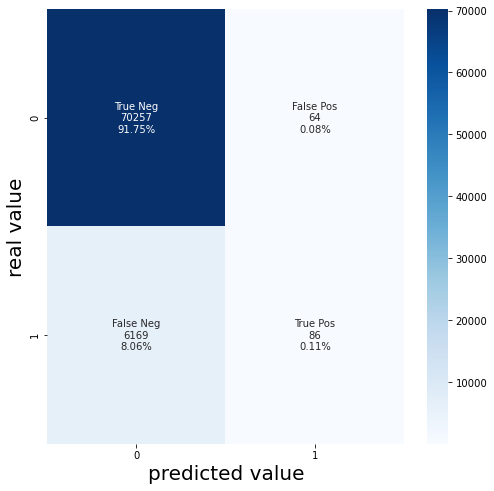

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70321
           1       0.57      0.01      0.03      6255

    accuracy                           0.92     76576
   macro avg       0.75      0.51      0.49     76576
weighted avg       0.89      0.92      0.88     76576


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [18]:
viz_performance_model(y_actu, y_pred)

Test du LGBMClassifier avec le paramètre objective = binary

In [19]:
# On va réentrainer le modèle avec ces nouvelles features
model2 =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1,objective='Binary')
model2.fit(train_X,train_y)
print('Création d un modèle LGBM classifier sur ces nouvelles données avec feature engineering')
print('roc auc score:',roc_auc_score(test_y,model2.predict_proba(test_X)[:,1]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Création d un modèle LGBM classifier sur ces nouvelles données avec feature engineering
roc auc score: 0.7460034492279329


In [20]:
score_model(model2,test_X, test_y)

ROC_AUC score : 0.7460034492279329
Predicted 1s:  150
classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     70321
           1       0.57      0.01      0.03      6255

    accuracy                           0.92     76576
   macro avg       0.75      0.51      0.49     76576
weighted avg       0.89      0.92      0.88     76576



Les performances de ce modèle sont les suivantes :



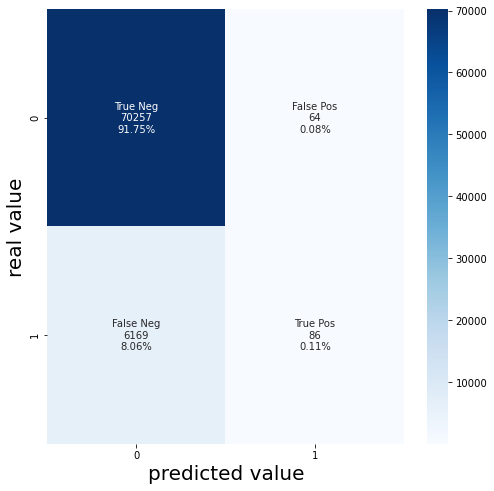

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70321
           1       0.57      0.01      0.03      6255

    accuracy                           0.92     76576
   macro avg       0.75      0.51      0.49     76576
weighted avg       0.89      0.92      0.88     76576


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [21]:
y_pred2=model2.predict(test_X)
y_pred2 = pd.Series(y_pred2, name = 'Predicted')
viz_performance_model(y_actu, y_pred2)

Le paramètre binary a donc l'air d'être celui utilisé par défaut

Test du LGBMClassifier avec le paramètre is is_unbalanced

In [22]:
# On va réentrainer le modèle avec le paramètre is_unbalance
model3 =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1,is_unbalance =True)
model3.fit(train_X,train_y)
print('Création d un modèle LGBM classifier sur ces nouvelles données avec feature engineering')
print('roc auc score:',roc_auc_score(test_y,model3.predict_proba(test_X)[:,1]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Création d un modèle LGBM classifier sur ces nouvelles données avec feature engineering
roc auc score: 0.7440487882159112


In [23]:
score_model(model3,test_X, test_y)

ROC_AUC score : 0.7440487882159112
Predicted 1s:  24473
classification report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.82     70321
           1       0.17      0.65      0.27      6255

    accuracy                           0.71     76576
   macro avg       0.56      0.68      0.54     76576
weighted avg       0.89      0.71      0.77     76576



Le paramètre is_unbalanced améliore le modèle : on a plus de 1 prédits, on a un meilleur rappel.

Les performances de ce modèle sont les suivantes :



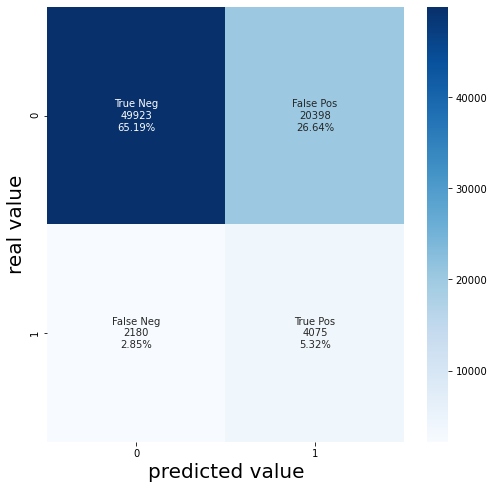

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     70321
           1       0.17      0.65      0.27      6255

    accuracy                           0.71     76576
   macro avg       0.56      0.68      0.54     76576
weighted avg       0.89      0.71      0.77     76576


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [24]:
y_pred3=model3.predict(test_X)
y_pred3 = pd.Series(y_pred3, name = 'Predicted')
viz_performance_model(y_actu, y_pred3)

Le taux de faux négatifs diminue fortement, ce qui est excellent, car on ne veut pas accorder de crédits à des gens qui feraient défaut

### Approche utilisant la focale loss

On va tester une nouvelle option, la fonction de cout focal loss pour essayer d'optimiser les résultats
https://towardsdatascience.com/lightgbm-with-the-focal-loss-for-imbalanced-datasets-9836a9ae00ca

In [25]:
from scipy.misc import derivative

# Définition de la fonction objective : focale loss
def focal_loss_lgb(y_pred, y_true, alpha, gamma):
    a,g = alpha, gamma
    def fl(x,t):
        p = 1/(1+np.exp(-x))
        return -( a*t + (1-a)*(1-t) ) * (( 1 - ( t*p + (1-t)*(1-p)) )**g) * ( t*np.log(p)+(1-t)*np.log(1-p) )
    partial_fl = lambda x: fl(x, y_true)
    grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
    hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
    return grad, hess

In [26]:
# Défintion de la fonction d'évalulation LGBM associée à la focale loss
def focal_loss_lgb_eval_error(y_pred, y_true, alpha, gamma):
    a,g = alpha, gamma
    p = 1/(1+np.exp(-y_pred))
    loss = -( a*y_true + (1-a)*(1-y_true) ) * (( 1 - ( y_true*p + (1-y_true)*(1-p)) )**g) * ( y_true*np.log(p)+(1-y_true)*np.log(1-p) )
    # (eval_name, eval_result, is_higher_better)
    return 'focal_loss', np.mean(loss), False

In [27]:
# On splitte le jeu de données en test/validation set
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.20, random_state=2)

In [28]:
focal_loss = lambda x,y: focal_loss_lgb(x, y, alpha=1, gamma=1)
focal_loss_eval = lambda x,y: focal_loss_lgb_eval_error(x, y, alpha=1, gamma=1)

On va faire tourner une première fois le modèle en changeant simplement la fonction objectif.

In [29]:
model5 =LGBMClassifier(objective=focal_loss ,
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1)

In [30]:
model5.fit( X_train,y_train, 
           eval_metric=focal_loss_eval,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
[3]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
[4]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
[5]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
[6]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
[7]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
[8]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
[9]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
[10]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
[11]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 2.80272	valid_0's focal_loss: 0


LGBMClassifier(n_estimators=200,
               objective=<function <lambda> at 0x0000020828A95A60>)

Il y a un problème car la focal loss est à 0 (le minimum possible). Le modèle n'a plus rien à faire et s'arrête

On va donc cherehcer dans un premier temps à savoir si les fonctions focal_loss_lgb et focal_loss_lgb_eval_error sont incorrectes. On va essayer de créer une nouvelle fonction évaluation avec le f1-score

In [31]:
from scipy.special import expit as sigmoid
from sklearn.metrics import f1_score

In [32]:
def focal_loss_lgb_f1_score(y_preds, y_true):
    y_preds = sigmoid(y_preds)
    binary_preds = [int(p>0.5) for p in y_preds]
    return 'f1', f1_score(y_true, binary_preds), True

In [33]:
model5.fit( X_train,y_train, 
           eval_metric=focal_loss_lgb_f1_score,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

[1]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
[3]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
[4]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
[5]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
[6]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
[7]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
[8]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
[9]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
[10]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
[11]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 2.80272	valid_0's f1: 0


LGBMClassifier(n_estimators=200,
               objective=<function <lambda> at 0x0000020828A95A60>)

Mais le score évalué reste à 0

Si ni la fonction focal loss eval ne fonctionne ni le f1_score ne fonctionne alors il est posisble que ce soit la focal_loss_lgb qui soit incorrecte. One ssaie l'objective fonction binary en gardant l'eval f1 score. 

In [34]:
model6 =LGBMClassifier(objective='binary' ,
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1)

In [35]:
model6.fit( X_train,y_train, 
           eval_metric=focal_loss_lgb_f1_score,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

Cette erreur est liée à sklearn.L'erreur peut provenir de l'utilisation de la fonction f1_score et de ce que qu'on lui envoie en paramètre.
On va faire des prints de binary_preds, y_preds et y_tru pour essayer de comprendre si les inputs sont corrects. 

In [36]:
def focal_loss_lgb_f1_score_binary(y_preds, y_true):
    y_preds = sigmoid(y_preds)
    binary_preds = [int(p>0.5) for p in y_preds]
    print("binary_preds", binary_preds[:10])
    print("y_true", y_true[:10])
    return 'f1', f1_score(y_true, binary_preds), True

In [37]:
model6.fit( X_train,y_train, 
           eval_metric=focal_loss_lgb_f1_score_binary,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

binary_preds [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_true [0.0795167  0.07748747 0.07946493 0.0795167  0.07610593 0.07748747
 0.08812186 0.11708607 0.0927401  0.07748747]


ValueError: Classification metrics can't handle a mix of continuous and binary targets

On se rend compte que c'est y_true qui est un float.
On inverse y_preds et y_actual. Le f-score me retourne alorsquelque chose correctement > 0, mais qui ne s'améliore pas. Ce n'est pas tant étonnant, le modèle ne tient pas compte ici de la faible présence de la classe 1.

In [38]:
def focal_loss_lgb_f1_score_binary2(y_true,y_preds):
    y_preds = sigmoid(y_preds)
    binary_preds = [int(p>0.5) for p in y_preds]
    print("binary_preds", binary_preds[:10])
    print("y_true", y_true[:10])
    return 'f1', f1_score(y_true, binary_preds), True

In [39]:
model6.fit( X_train,y_train, 
           eval_metric=focal_loss_lgb_f1_score_binary2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

binary_preds [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1]	valid_0's binary_logloss: 0.278634	valid_0's f1: 0.150113
Training until validation scores don't improve for 10 rounds
binary_preds [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2]	valid_0's binary_logloss: 0.276305	valid_0's f1: 0.150113
binary_preds [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[3]	valid_0's binary_logloss: 0.27441	valid_0's f1: 0.150113
binary_preds [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[4]	valid_0's binary_logloss: 0.272643	valid_0's f1: 0.150113
binary_preds [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[5]	valid_0's binary_logloss: 0.271209	valid_0's f1: 0.150113
binary_preds [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[6]	valid_0's binary_logloss: 0.269924	valid_0's f1: 0.150113
binary_preds [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true [0. 0. 0. 0. 0. 0. 

LGBMClassifier(n_estimators=200, objective='binary')

Et c'est pareil pour la fonction objective et l'autre fonction d'évaluation.

In [40]:
# Définition de la fonction objective : focale loss
def focal_loss_lgb_correct(y_true, y_pred,alpha, gamma):
    a,g = alpha, gamma
    def fl(x,t):
        p = 1/(1+np.exp(-x))
        return -( a*t + (1-a)*(1-t) ) * (( 1 - ( t*p + (1-t)*(1-p)) )**g) * ( t*np.log(p)+(1-t)*np.log(1-p) )
    partial_fl = lambda x: fl(x, y_true)
    grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
    hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
    return grad, hess

In [41]:
# Défintion de la fonction d'évalulation LGBM associée à la focale loss
def focal_loss_lgb_eval_correct( y_true,y_pred, alpha, gamma):
    a,g = alpha, gamma
    p = 1/(1+np.exp(-y_pred))
    loss = -( a*y_true + (1-a)*(1-y_true) ) * (( 1 - ( y_true*p + (1-y_true)*(1-p)) )**g) * ( y_true*np.log(p)+(1-y_true)*np.log(1-p) )
    # (eval_name, eval_result, is_higher_better)
    return 'focal_loss', np.mean(loss), False

On va donc faire retourner le modèle classique, cette fois ci avec la eval metric focal loss et sans is_unbalanced=True

In [42]:
a, g =1,1
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [43]:
model7 =LGBMClassifier(objective='binary' ,
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1)

In [44]:
model7.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

[1]	valid_0's binary_logloss: 0.278634	valid_0's focal_loss: 0.0253587
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.276305	valid_0's focal_loss: 0.0252681
[3]	valid_0's binary_logloss: 0.27441	valid_0's focal_loss: 0.0251873
[4]	valid_0's binary_logloss: 0.272643	valid_0's focal_loss: 0.0251093
[5]	valid_0's binary_logloss: 0.271209	valid_0's focal_loss: 0.0250427
[6]	valid_0's binary_logloss: 0.269924	valid_0's focal_loss: 0.0249811
[7]	valid_0's binary_logloss: 0.26868	valid_0's focal_loss: 0.0249195
[8]	valid_0's binary_logloss: 0.267601	valid_0's focal_loss: 0.0248645
[9]	valid_0's binary_logloss: 0.266757	valid_0's focal_loss: 0.0248175
[10]	valid_0's binary_logloss: 0.266024	valid_0's focal_loss: 0.0247745
[11]	valid_0's binary_logloss: 0.26528	valid_0's focal_loss: 0.0247324
[12]	valid_0's binary_logloss: 0.264569	valid_0's focal_loss: 0.0246883
[13]	valid_0's binary_logloss: 0.263895	valid_0's focal_loss: 0.0246476
[14]	valid_0's 

LGBMClassifier(n_estimators=200, objective='binary')

In [45]:
score_model(model7,test_X, test_y)

ROC_AUC score : 0.740950369068662
Predicted 1s:  193
classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     70321
           1       0.47      0.01      0.03      6255

    accuracy                           0.92     76576
   macro avg       0.70      0.51      0.49     76576
weighted avg       0.88      0.92      0.88     76576



On a encore très peu de 1 prédits.

On va désormais utiliser la fonction focale loss comme fonction objectif, pour le moment avec alpha et gamma = 1

In [46]:
model8 =LGBMClassifier(objective=focal_loss2 ,
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1,
                      is_unbalance=False)

In [47]:
model8.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.287073	valid_0's focal_loss: 0.0244378
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.349929	valid_0's focal_loss: 0.0213291
[3]	valid_0's binary_logloss: 0.44457	valid_0's focal_loss: 0.0186869
[4]	valid_0's binary_logloss: 0.560491	valid_0's focal_loss: 0.0164215
[5]	valid_0's binary_logloss: 0.697432	valid_0's focal_loss: 0.0144715
[6]	valid_0's binary_logloss: 0.85983	valid_0's focal_loss: 0.0127834
[7]	valid_0's binary_logloss: 1.05705	valid_0's focal_loss: 0.0113141
[8]	valid_0's binary_logloss: 1.30665	valid_0's focal_loss: 0.0100315
[9]	valid_0's binary_logloss: 1.64668	valid_0's focal_loss: 0.00890833
[10]	valid_0's binary_logloss: 2.18484	valid_0's focal_loss: 0.00792205
[11]	valid_0's binary_logloss: 3.60457	valid_0's focal_loss: 0.00705493
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.287073	valid_0's focal_loss: 0.0244378


LGBMClassifier(is_unbalance=False, n_estimators=200,
               objective=<function <lambda> at 0x00000208290C0D30>)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


Les performances de ce modèle sont les suivantes :



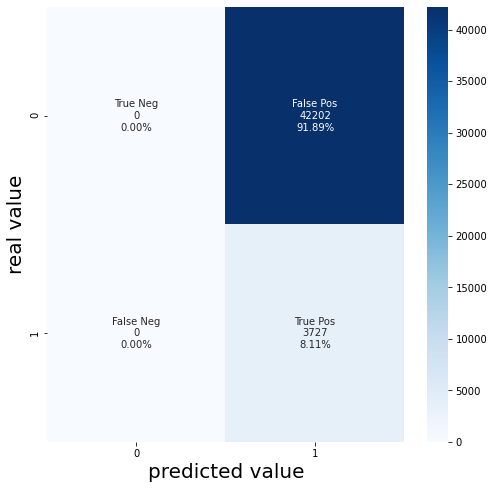

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     42202
           1       0.08      1.00      0.15      3727

    accuracy                           0.08     45929
   macro avg       0.04      0.50      0.08     45929
weighted avg       0.01      0.08      0.01     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
preds = sigmoid(model8.predict(X_val)).round(0)
viz_performance_model(y_val, preds)

Le modèle devrait par contre s'arrêter à la 11e iteration. Il semblerait que l'early stopping rounds fonctionnait sur la binary_logloss et pas sur la focal_loss . Dans la doc, il est expliqué que peu importe l' eval_metric spécifié, la métrique du modèle définie via metric est toujours utilisée. Ca explique pourquoi on retrouve le binary_logloss alors
qu'on ne l'a pas spécifié.

En allant chercher dans les paramètres ce qu'il était possible de faire avec le paramètre ` metric ` du modèle (et pas de la fonction fit ), il est écrit que par défaut la valeur "" correspond à la fonction objective. Sauf que c'est plutôt faux ici, soit c'est un bug soit la doc n'est pas à jour. On teste avec metric='' explicitement sur le modèle

In [49]:
model9 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [50]:
model9.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's focal_loss: 0.0244378
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 0.0213291
[3]	valid_0's focal_loss: 0.0186869
[4]	valid_0's focal_loss: 0.0164215
[5]	valid_0's focal_loss: 0.0144715
[6]	valid_0's focal_loss: 0.0127834
[7]	valid_0's focal_loss: 0.0113141
[8]	valid_0's focal_loss: 0.0100315
[9]	valid_0's focal_loss: 0.00890833
[10]	valid_0's focal_loss: 0.00792205
[11]	valid_0's focal_loss: 0.00705493
[12]	valid_0's focal_loss: 0.00628983
[13]	valid_0's focal_loss: 0.00561357
[14]	valid_0's focal_loss: 0.00501447
[15]	valid_0's focal_loss: 0.00448309
[16]	valid_0's focal_loss: 0.0040112
[17]	valid_0's focal_loss: 0.00359168
[18]	valid_0's focal_loss: 0.00321836
[19]	valid_0's focal_loss: 0.00288547
[20]	valid_0's focal_loss: 0.00258827
[21]	valid_0's focal_loss: 0.00232296
[22]	valid_0's focal_loss: 0.00208589
[23]	valid_0's focal_loss: 0.00187404
[24]	valid_0's focal_loss: 0.00168435
[25]	valid_0's focal_loss: 0.00151424
[26]	va

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x00000208290C0D30>)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


Les performances de ce modèle sont les suivantes :



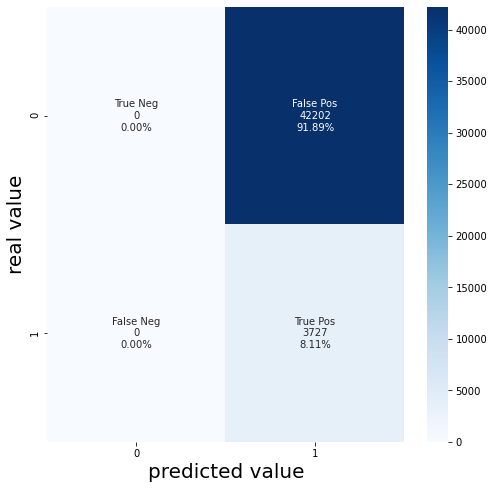

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     42202
           1       0.08      1.00      0.15      3727

    accuracy                           0.08     45929
   macro avg       0.04      0.50      0.08     45929
weighted avg       0.01      0.08      0.01     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
preds2 = sigmoid(model9.predict(X_val)).round(0)
viz_performance_model(y_val, preds2)

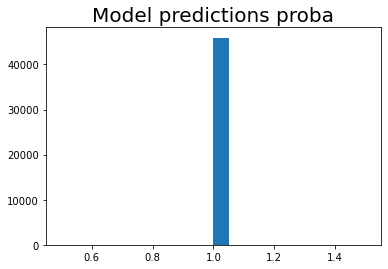

In [52]:
plt.hist(preds2, bins = 20)
plt.title('Model predictions proba', fontsize=20)
plt.show()

Cette fois c'est bon, l'optimisation par fonction objective fonctionne, et l'early stopping aussi. On peut regarder les résultats, en n'oubliant pas d'utiliser la fonction sigmoid sur les prédictions qui sont "raw" étant donné que le modèle utilise une fonction objective

On ne prédit que des valeur 1. on va faire varier les paramètres alpha et gamma pour voir ce qu'il se passe.

In [53]:
# Analyse de l'impact alpha et gamma de manière empirique

In [54]:
a, g =0.2,1
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [55]:
model10 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [56]:
model10.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's focal_loss: 0.229112
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 0.20284
[3]	valid_0's focal_loss: 0.18058
[4]	valid_0's focal_loss: 0.161604
[5]	valid_0's focal_loss: 0.145354
[6]	valid_0's focal_loss: 0.131374
[7]	valid_0's focal_loss: 0.119308
[8]	valid_0's focal_loss: 0.108869
[9]	valid_0's focal_loss: 0.0998116
[10]	valid_0's focal_loss: 0.0919391
[11]	valid_0's focal_loss: 0.0850831
[12]	valid_0's focal_loss: 0.079115
[13]	valid_0's focal_loss: 0.0739186
[14]	valid_0's focal_loss: 0.0693836
[15]	valid_0's focal_loss: 0.065429
[16]	valid_0's focal_loss: 0.0619741
[17]	valid_0's focal_loss: 0.0589612
[18]	valid_0's focal_loss: 0.0563276
[19]	valid_0's focal_loss: 0.0540326
[20]	valid_0's focal_loss: 0.0520368
[21]	valid_0's focal_loss: 0.0502909
[22]	valid_0's focal_loss: 0.0487713
[23]	valid_0's focal_loss: 0.047444
[24]	valid_0's focal_loss: 0.0462896
[25]	valid_0's focal_loss: 0.0452967
[26]	valid_0's focal_loss: 0.0444235

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x00000208292EB550>)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


Les performances de ce modèle sont les suivantes :



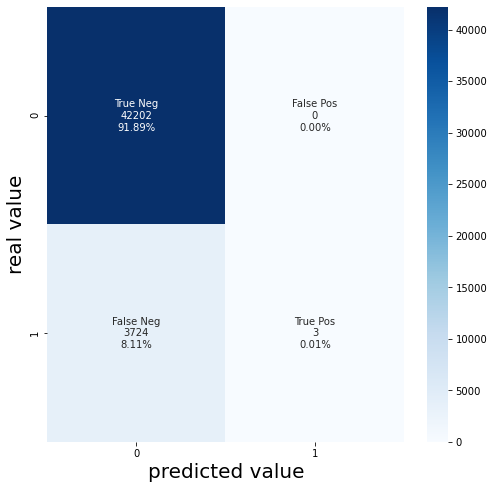

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42202
           1       1.00      0.00      0.00      3727

    accuracy                           0.92     45929
   macro avg       0.96      0.50      0.48     45929
weighted avg       0.93      0.92      0.88     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [57]:
preds3 = sigmoid(model10.predict(X_val)).round(0)
proba3=sigmoid(model10.predict(X_val))
pro3=model10.predict(X_val)
viz_performance_model(y_val, preds3)

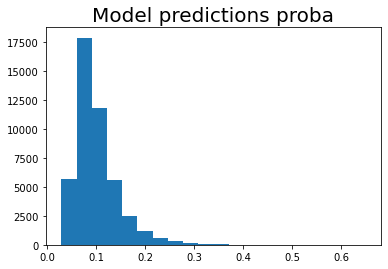

In [58]:
plt.hist(proba3, bins = 20)
plt.title('Model predictions proba', fontsize=20)
plt.show()

In [59]:
a, g =0.5,1
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [60]:
model11 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [61]:
model11.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's focal_loss: 0.157117
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 0.143625
[3]	valid_0's focal_loss: 0.132293
[4]	valid_0's focal_loss: 0.122724
[5]	valid_0's focal_loss: 0.114635
[6]	valid_0's focal_loss: 0.107754
[7]	valid_0's focal_loss: 0.10191
[8]	valid_0's focal_loss: 0.0969191
[9]	valid_0's focal_loss: 0.0926471
[10]	valid_0's focal_loss: 0.0890065
[11]	valid_0's focal_loss: 0.0858933
[12]	valid_0's focal_loss: 0.0832177
[13]	valid_0's focal_loss: 0.0809368
[14]	valid_0's focal_loss: 0.0789835
[15]	valid_0's focal_loss: 0.0772755
[16]	valid_0's focal_loss: 0.0758478
[17]	valid_0's focal_loss: 0.0745951
[18]	valid_0's focal_loss: 0.0735342
[19]	valid_0's focal_loss: 0.0725828
[20]	valid_0's focal_loss: 0.0717751
[21]	valid_0's focal_loss: 0.0710975
[22]	valid_0's focal_loss: 0.0705231
[23]	valid_0's focal_loss: 0.0700067
[24]	valid_0's focal_loss: 0.0695759
[25]	valid_0's focal_loss: 0.0692083
[26]	valid_0's focal_loss: 0.06

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x00000208289F4040>)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


Les performances de ce modèle sont les suivantes :



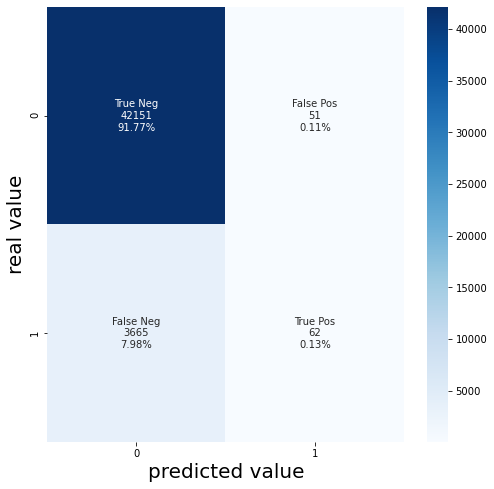

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42202
           1       0.55      0.02      0.03      3727

    accuracy                           0.92     45929
   macro avg       0.73      0.51      0.50     45929
weighted avg       0.89      0.92      0.88     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [62]:
preds3 = sigmoid(model11.predict(X_val)).round(0)
proba3=sigmoid(model11.predict(X_val))
viz_performance_model(y_val, preds3)

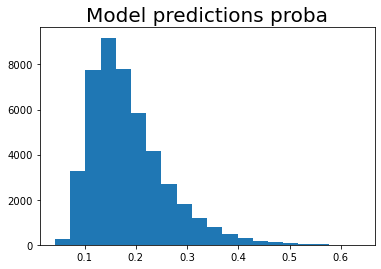

In [63]:
plt.hist(proba3, bins = 20)
plt.title('Model predictions proba', fontsize=20)
plt.show()

In [64]:
a, g =0.5,1
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [65]:
model12 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [66]:
model12.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's focal_loss: 0.157117
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 0.143625
[3]	valid_0's focal_loss: 0.132293
[4]	valid_0's focal_loss: 0.122724
[5]	valid_0's focal_loss: 0.114635
[6]	valid_0's focal_loss: 0.107754
[7]	valid_0's focal_loss: 0.10191
[8]	valid_0's focal_loss: 0.0969191
[9]	valid_0's focal_loss: 0.0926471
[10]	valid_0's focal_loss: 0.0890065
[11]	valid_0's focal_loss: 0.0858933
[12]	valid_0's focal_loss: 0.0832177
[13]	valid_0's focal_loss: 0.0809368
[14]	valid_0's focal_loss: 0.0789835
[15]	valid_0's focal_loss: 0.0772755
[16]	valid_0's focal_loss: 0.0758478
[17]	valid_0's focal_loss: 0.0745951
[18]	valid_0's focal_loss: 0.0735342
[19]	valid_0's focal_loss: 0.0725828
[20]	valid_0's focal_loss: 0.0717751
[21]	valid_0's focal_loss: 0.0710975
[22]	valid_0's focal_loss: 0.0705231
[23]	valid_0's focal_loss: 0.0700067
[24]	valid_0's focal_loss: 0.0695759
[25]	valid_0's focal_loss: 0.0692083
[26]	valid_0's focal_loss: 0.06

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x0000020828BA0AF0>)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


Les performances de ce modèle sont les suivantes :



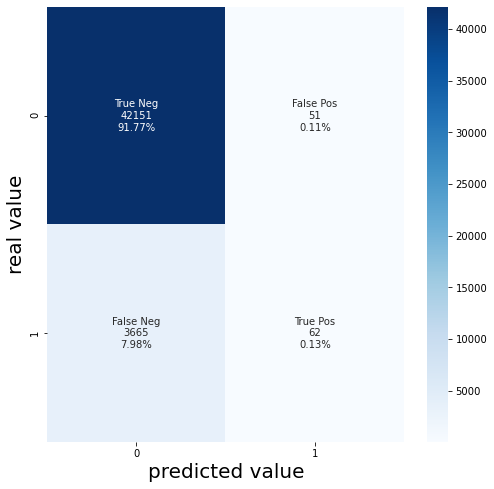

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42202
           1       0.55      0.02      0.03      3727

    accuracy                           0.92     45929
   macro avg       0.73      0.51      0.50     45929
weighted avg       0.89      0.92      0.88     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [67]:
preds3 = sigmoid(model12.predict(X_val)).round(0)
prob3 = sigmoid(model12.predict(X_val))
viz_performance_model(y_val, preds3)

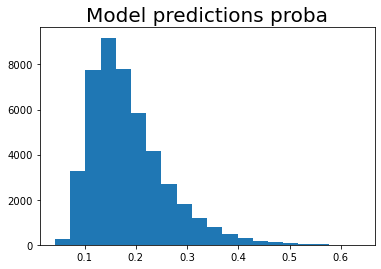

In [68]:
plt.hist(prob3, bins = 20)
plt.title('Model predictions proba', fontsize=20)
plt.show()

In [69]:
a, g =0.7,1
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [70]:
model13 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [71]:
model13.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's focal_loss: 0.108186
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 0.102353
[3]	valid_0's focal_loss: 0.0974688
[4]	valid_0's focal_loss: 0.0934147
[5]	valid_0's focal_loss: 0.0900022
[6]	valid_0's focal_loss: 0.087143
[7]	valid_0's focal_loss: 0.0847209
[8]	valid_0's focal_loss: 0.0826576
[9]	valid_0's focal_loss: 0.0809061
[10]	valid_0's focal_loss: 0.0794277
[11]	valid_0's focal_loss: 0.0781621
[12]	valid_0's focal_loss: 0.0770742
[13]	valid_0's focal_loss: 0.0761546
[14]	valid_0's focal_loss: 0.0753733
[15]	valid_0's focal_loss: 0.0746905
[16]	valid_0's focal_loss: 0.0740886
[17]	valid_0's focal_loss: 0.0735649
[18]	valid_0's focal_loss: 0.0731195
[19]	valid_0's focal_loss: 0.0726918
[20]	valid_0's focal_loss: 0.0723617
[21]	valid_0's focal_loss: 0.0720665
[22]	valid_0's focal_loss: 0.0718097
[23]	valid_0's focal_loss: 0.0715384
[24]	valid_0's focal_loss: 0.0712673
[25]	valid_0's focal_loss: 0.0710663
[26]	valid_0's focal_loss:

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x000002082932B9D0>)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


Les performances de ce modèle sont les suivantes :



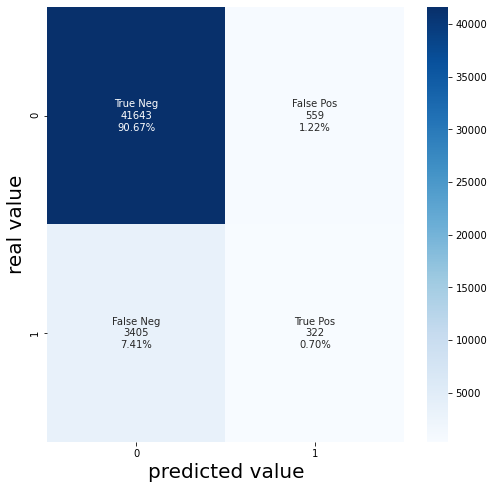

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     42202
           1       0.37      0.09      0.14      3727

    accuracy                           0.91     45929
   macro avg       0.64      0.54      0.55     45929
weighted avg       0.88      0.91      0.89     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [72]:
preds3 = sigmoid(model13.predict(X_val)).round(0)
viz_performance_model(y_val, preds3)

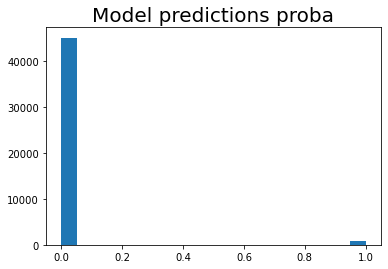

In [73]:
plt.hist(preds3, bins = 20)
plt.title('Model predictions proba', fontsize=20)
plt.show()

Le paramètre alpha permet donc d'ajuster les prédictions entre 0 et 1

In [74]:
a, g =0.7,5
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [75]:
model14 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [76]:
model14.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's focal_loss: 0.00683207
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 0.00651742
[3]	valid_0's focal_loss: 0.00624995
[4]	valid_0's focal_loss: 0.00602353
[5]	valid_0's focal_loss: 0.00583184
[6]	valid_0's focal_loss: 0.00567038
[7]	valid_0's focal_loss: 0.00553281
[8]	valid_0's focal_loss: 0.00541519
[9]	valid_0's focal_loss: 0.00531502
[10]	valid_0's focal_loss: 0.00523114
[11]	valid_0's focal_loss: 0.00515885
[12]	valid_0's focal_loss: 0.00509707
[13]	valid_0's focal_loss: 0.00504507
[14]	valid_0's focal_loss: 0.00500048
[15]	valid_0's focal_loss: 0.00496287
[16]	valid_0's focal_loss: 0.00492935
[17]	valid_0's focal_loss: 0.00489908
[18]	valid_0's focal_loss: 0.00487532
[19]	valid_0's focal_loss: 0.00485222
[20]	valid_0's focal_loss: 0.00483298
[21]	valid_0's focal_loss: 0.00481436
[22]	valid_0's focal_loss: 0.00479845
[23]	valid_0's focal_loss: 0.00478666
[24]	valid_0's focal_loss: 0.00477493
[25]	valid_0's focal_loss: 0.0047629

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x000002083F05B160>)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


Les performances de ce modèle sont les suivantes :



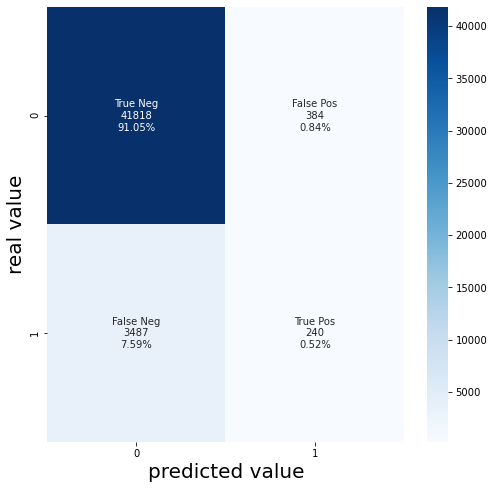

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42202
           1       0.38      0.06      0.11      3727

    accuracy                           0.92     45929
   macro avg       0.65      0.53      0.53     45929
weighted avg       0.88      0.92      0.89     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [77]:
preds3 = sigmoid(model14.predict(X_val)).round(0)
viz_performance_model(y_val, preds3)

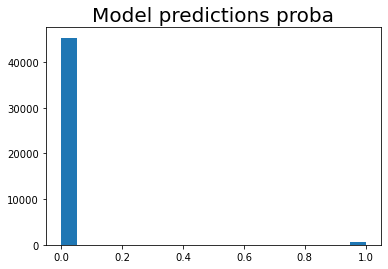

In [78]:
plt.hist(preds3, bins = 20)
plt.title('Model predictions proba', fontsize=20)
plt.show()

In [79]:
a, g =0.7,10
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [80]:
model14 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [81]:
model14.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's focal_loss: 0.000214187
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 0.000204886
[3]	valid_0's focal_loss: 0.00019695
[4]	valid_0's focal_loss: 0.000190166
[5]	valid_0's focal_loss: 0.000184432
[6]	valid_0's focal_loss: 0.000179589
[7]	valid_0's focal_loss: 0.000175466
[8]	valid_0's focal_loss: 0.000171947
[9]	valid_0's focal_loss: 0.000168969
[10]	valid_0's focal_loss: 0.000166408
[11]	valid_0's focal_loss: 0.000164225
[12]	valid_0's focal_loss: 0.00016236
[13]	valid_0's focal_loss: 0.000160772
[14]	valid_0's focal_loss: 0.000159462
[15]	valid_0's focal_loss: 0.000158324
[16]	valid_0's focal_loss: 0.00015727
[17]	valid_0's focal_loss: 0.000156385
[18]	valid_0's focal_loss: 0.000155675
[19]	valid_0's focal_loss: 0.000154951
[20]	valid_0's focal_loss: 0.000154372
[21]	valid_0's focal_loss: 0.000153837
[22]	valid_0's focal_loss: 0.000153365
[23]	valid_0's focal_loss: 0.000152976
[24]	valid_0's focal_loss: 0.000152626
[25]	valid_0's 

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x000002083F2F7160>)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


Les performances de ce modèle sont les suivantes :



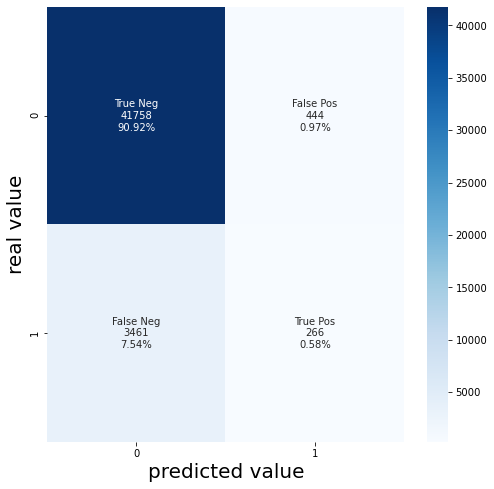

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42202
           1       0.37      0.07      0.12      3727

    accuracy                           0.91     45929
   macro avg       0.65      0.53      0.54     45929
weighted avg       0.88      0.91      0.89     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [82]:
preds3 = sigmoid(model14.predict(X_val)).round(0)
viz_performance_model(y_val, preds3)

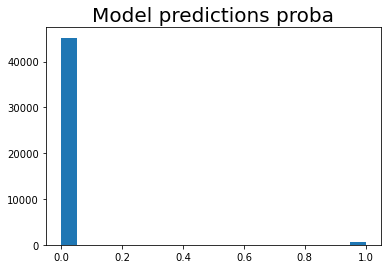

In [83]:
plt.hist(preds3, bins = 20)
plt.title('Model predictions proba', fontsize=20)
plt.show()

In [84]:
a, g =0.7,20
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [85]:
model15 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [86]:
model15.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's focal_loss: 2.0957e-07
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 2.00808e-07
[3]	valid_0's focal_loss: 1.93313e-07
[4]	valid_0's focal_loss: 1.86921e-07
[5]	valid_0's focal_loss: 1.81488e-07
[6]	valid_0's focal_loss: 1.76885e-07
[7]	valid_0's focal_loss: 1.7298e-07
[8]	valid_0's focal_loss: 1.69634e-07
[9]	valid_0's focal_loss: 1.668e-07
[10]	valid_0's focal_loss: 1.64396e-07
[11]	valid_0's focal_loss: 1.62384e-07
[12]	valid_0's focal_loss: 1.60589e-07
[13]	valid_0's focal_loss: 1.59091e-07
[14]	valid_0's focal_loss: 1.57848e-07
[15]	valid_0's focal_loss: 1.56769e-07
[16]	valid_0's focal_loss: 1.55859e-07
[17]	valid_0's focal_loss: 1.55052e-07
[18]	valid_0's focal_loss: 1.54374e-07
[19]	valid_0's focal_loss: 1.53785e-07
[20]	valid_0's focal_loss: 1.53279e-07
[21]	valid_0's focal_loss: 1.52812e-07
[22]	valid_0's focal_loss: 1.52309e-07
[23]	valid_0's focal_loss: 1.51979e-07
[24]	valid_0's focal_loss: 1.51583e-07
[25]	valid_0's f

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x000002083F05BB80>)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


Les performances de ce modèle sont les suivantes :



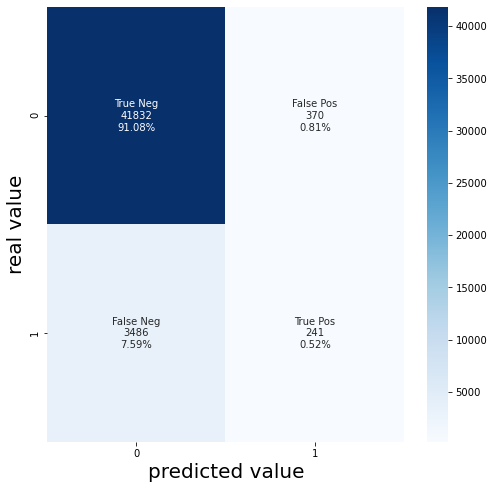

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42202
           1       0.39      0.06      0.11      3727

    accuracy                           0.92     45929
   macro avg       0.66      0.53      0.53     45929
weighted avg       0.88      0.92      0.89     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [87]:
preds3 = sigmoid(model15.predict(X_val)).round(0)
viz_performance_model(y_val, preds3)

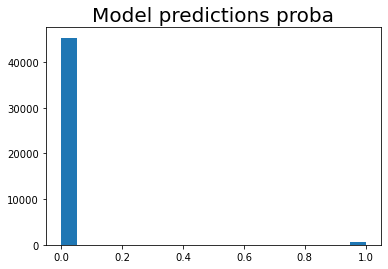

In [88]:
plt.hist(preds3, bins = 20)
plt.title('Model predictions proba', fontsize=20)
plt.show()

Le paramètre gamma règle la "largeur" de la distribution de probabilité. Lorsque gamma = 20, on a des probabilités prédites quasi tout le temps identiques

D'un point de vue métier, il est important de ne pas prédire d'acceptation des crédits là ou le client a fait effectivement défaut, c'est à dire de limiter au maximum le nombre de faux négatif.
En ce qui concerne les faux positifs, ces dossiers restants devront être revus manuellement par un service dédié avant de notifier le client de son rejet. Il est important que cette quantité reste relativement faible pour pouvoir être gérable manuellement

Pour valider correctement le bon modèle, on va définir la logique suivante :
- Chaque faux négatif va coûter 20 000€ à la banque (il faudrait le confirmer d'un point de vue métier)
- Chaque faux positif va coûter 700€ de frais de retraitement manuel à la banque (idem, à confirmer)
On pourrait implémenter un modèle de scoring

In [89]:
a, g =0.9,20
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [90]:
model16 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [91]:
model16.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's focal_loss: 1.07962e-07
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 1.07097e-07
[3]	valid_0's focal_loss: 1.06374e-07
[4]	valid_0's focal_loss: 1.057e-07
[5]	valid_0's focal_loss: 1.05144e-07
[6]	valid_0's focal_loss: 1.04626e-07
[7]	valid_0's focal_loss: 1.04148e-07
[8]	valid_0's focal_loss: 1.03734e-07
[9]	valid_0's focal_loss: 1.03313e-07
[10]	valid_0's focal_loss: 1.03031e-07
[11]	valid_0's focal_loss: 1.02737e-07
[12]	valid_0's focal_loss: 1.0245e-07
[13]	valid_0's focal_loss: 1.02154e-07
[14]	valid_0's focal_loss: 1.01917e-07
[15]	valid_0's focal_loss: 1.01733e-07
[16]	valid_0's focal_loss: 1.01502e-07
[17]	valid_0's focal_loss: 1.01302e-07
[18]	valid_0's focal_loss: 1.01058e-07
[19]	valid_0's focal_loss: 1.00872e-07
[20]	valid_0's focal_loss: 1.00672e-07
[21]	valid_0's focal_loss: 1.00542e-07
[22]	valid_0's focal_loss: 1.00387e-07
[23]	valid_0's focal_loss: 1.00216e-07
[24]	valid_0's focal_loss: 1.0009e-07
[25]	valid_0's f

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x00000208290D3E50>)

In [92]:
preds3 = sigmoid(model16.predict(X_val)).round(0)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, preds3)
print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:922: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


[[33570  8632]
 [ 1713  2014]]


In [93]:
cm[0,1]*700+cm[1,0]*20000

40302400

On va créer une grid search pour trouver les meilleurs hyperparamètres en fonction de ce scoring

In [94]:
scoring={}

In [95]:
alpha = [0.7, 0.8, 0.9, 1]
gamma = [10, 15, 20, 25, 30]

In [96]:
for a in alpha :
    for g in gamma :
        focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
        focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)
        
        model17 =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )
        
        model17.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)
        
        preds3 = sigmoid(model17.predict(X_val)).round(0)
        
        cm = confusion_matrix(y_val, preds3)
        
        scoring["a"+str(a)+("/")+"g"+str(g)]=cm[0,1]*700+cm[1,0]*20000
        

[1]	valid_0's focal_loss: 0.000214187
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 0.000204886
[3]	valid_0's focal_loss: 0.00019695
[4]	valid_0's focal_loss: 0.000190166
[5]	valid_0's focal_loss: 0.000184432
[6]	valid_0's focal_loss: 0.000179589
[7]	valid_0's focal_loss: 0.000175466
[8]	valid_0's focal_loss: 0.000171947
[9]	valid_0's focal_loss: 0.000168969
[10]	valid_0's focal_loss: 0.000166408
[11]	valid_0's focal_loss: 0.000164225
[12]	valid_0's focal_loss: 0.00016236
[13]	valid_0's focal_loss: 0.000160772
[14]	valid_0's focal_loss: 0.000159462
[15]	valid_0's focal_loss: 0.000158324
[16]	valid_0's focal_loss: 0.00015727
[17]	valid_0's focal_loss: 0.000156385
[18]	valid_0's focal_loss: 0.000155675
[19]	valid_0's focal_loss: 0.000154951
[20]	valid_0's focal_loss: 0.000154372
[21]	valid_0's focal_loss: 0.000153837
[22]	valid_0's focal_loss: 0.000153365
[23]	valid_0's focal_loss: 0.000152976
[24]	valid_0's focal_loss: 0.000152626
[25]	valid_0's 

[98]	valid_0's focal_loss: 4.66637e-06
[99]	valid_0's focal_loss: 4.66657e-06
[100]	valid_0's focal_loss: 4.66693e-06
[101]	valid_0's focal_loss: 4.66729e-06
[102]	valid_0's focal_loss: 4.66722e-06
[103]	valid_0's focal_loss: 4.66761e-06
[104]	valid_0's focal_loss: 4.66683e-06
[105]	valid_0's focal_loss: 4.66581e-06
[106]	valid_0's focal_loss: 4.66589e-06
[107]	valid_0's focal_loss: 4.66686e-06
Early stopping, best iteration is:
[97]	valid_0's focal_loss: 4.66539e-06
[1]	valid_0's focal_loss: 2.0957e-07
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 2.00808e-07
[3]	valid_0's focal_loss: 1.93313e-07
[4]	valid_0's focal_loss: 1.86921e-07
[5]	valid_0's focal_loss: 1.81488e-07
[6]	valid_0's focal_loss: 1.76885e-07
[7]	valid_0's focal_loss: 1.7298e-07
[8]	valid_0's focal_loss: 1.69634e-07
[9]	valid_0's focal_loss: 1.668e-07
[10]	valid_0's focal_loss: 1.64396e-07
[11]	valid_0's focal_loss: 1.62384e-07
[12]	valid_0's focal_loss: 1.60589e-07
[13]	valid_0

[97]	valid_0's focal_loss: 4.5955e-09
[98]	valid_0's focal_loss: 4.5952e-09
[99]	valid_0's focal_loss: 4.59507e-09
[100]	valid_0's focal_loss: 4.594e-09
[101]	valid_0's focal_loss: 4.59299e-09
[102]	valid_0's focal_loss: 4.59248e-09
[103]	valid_0's focal_loss: 4.59112e-09
[104]	valid_0's focal_loss: 4.59109e-09
[105]	valid_0's focal_loss: 4.59122e-09
[106]	valid_0's focal_loss: 4.59192e-09
[107]	valid_0's focal_loss: 4.59141e-09
[108]	valid_0's focal_loss: 4.59071e-09
[109]	valid_0's focal_loss: 4.59086e-09
[110]	valid_0's focal_loss: 4.59038e-09
[111]	valid_0's focal_loss: 4.59095e-09
[112]	valid_0's focal_loss: 4.59122e-09
[113]	valid_0's focal_loss: 4.5914e-09
[114]	valid_0's focal_loss: 4.59125e-09
[115]	valid_0's focal_loss: 4.59141e-09
[116]	valid_0's focal_loss: 4.59127e-09
[117]	valid_0's focal_loss: 4.59073e-09
[118]	valid_0's focal_loss: 4.59079e-09
[119]	valid_0's focal_loss: 4.591e-09
[120]	valid_0's focal_loss: 4.59079e-09
Early stopping, best iteration is:
[110]	valid_0's

[182]	valid_0's focal_loss: 1.46577e-10
[183]	valid_0's focal_loss: 1.4655e-10
[184]	valid_0's focal_loss: 1.46539e-10
[185]	valid_0's focal_loss: 1.46532e-10
[186]	valid_0's focal_loss: 1.46525e-10
[187]	valid_0's focal_loss: 1.46515e-10
[188]	valid_0's focal_loss: 1.46512e-10
[189]	valid_0's focal_loss: 1.46508e-10
[190]	valid_0's focal_loss: 1.465e-10
[191]	valid_0's focal_loss: 1.46498e-10
[192]	valid_0's focal_loss: 1.46482e-10
[193]	valid_0's focal_loss: 1.46476e-10
[194]	valid_0's focal_loss: 1.46472e-10
[195]	valid_0's focal_loss: 1.46461e-10
[196]	valid_0's focal_loss: 1.46455e-10
[197]	valid_0's focal_loss: 1.46446e-10
[198]	valid_0's focal_loss: 1.46431e-10
[199]	valid_0's focal_loss: 1.46417e-10
[200]	valid_0's focal_loss: 1.46409e-10
Did not meet early stopping. Best iteration is:
[200]	valid_0's focal_loss: 1.46409e-10
[1]	valid_0's focal_loss: 0.000163368
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 0.000159222
[3]	valid_0's foca

[92]	valid_0's focal_loss: 4.12242e-06
[93]	valid_0's focal_loss: 4.12292e-06
[94]	valid_0's focal_loss: 4.12242e-06
[95]	valid_0's focal_loss: 4.12216e-06
[96]	valid_0's focal_loss: 4.1222e-06
[97]	valid_0's focal_loss: 4.12206e-06
Early stopping, best iteration is:
[87]	valid_0's focal_loss: 4.12201e-06
[1]	valid_0's focal_loss: 1.59724e-07
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 1.55821e-07
[3]	valid_0's focal_loss: 1.52474e-07
[4]	valid_0's focal_loss: 1.49627e-07
[5]	valid_0's focal_loss: 1.472e-07
[6]	valid_0's focal_loss: 1.45175e-07
[7]	valid_0's focal_loss: 1.4343e-07
[8]	valid_0's focal_loss: 1.41901e-07
[9]	valid_0's focal_loss: 1.40642e-07
[10]	valid_0's focal_loss: 1.39576e-07
[11]	valid_0's focal_loss: 1.38569e-07
[12]	valid_0's focal_loss: 1.37763e-07
[13]	valid_0's focal_loss: 1.37052e-07
[14]	valid_0's focal_loss: 1.36396e-07
[15]	valid_0's focal_loss: 1.35868e-07
[16]	valid_0's focal_loss: 1.35368e-07
[17]	valid_0's focal

[104]	valid_0's focal_loss: 4.03773e-09
[105]	valid_0's focal_loss: 4.03746e-09
[106]	valid_0's focal_loss: 4.03725e-09
[107]	valid_0's focal_loss: 4.03702e-09
[108]	valid_0's focal_loss: 4.03672e-09
[109]	valid_0's focal_loss: 4.03618e-09
[110]	valid_0's focal_loss: 4.03627e-09
[111]	valid_0's focal_loss: 4.03567e-09
[112]	valid_0's focal_loss: 4.03533e-09
[113]	valid_0's focal_loss: 4.03505e-09
[114]	valid_0's focal_loss: 4.03536e-09
[115]	valid_0's focal_loss: 4.03499e-09
[116]	valid_0's focal_loss: 4.03363e-09
[117]	valid_0's focal_loss: 4.03285e-09
[118]	valid_0's focal_loss: 4.03237e-09
[119]	valid_0's focal_loss: 4.03213e-09
[120]	valid_0's focal_loss: 4.03233e-09
[121]	valid_0's focal_loss: 4.03249e-09
[122]	valid_0's focal_loss: 4.03298e-09
[123]	valid_0's focal_loss: 4.03313e-09
[124]	valid_0's focal_loss: 4.03256e-09
[125]	valid_0's focal_loss: 4.03256e-09
[126]	valid_0's focal_loss: 4.03216e-09
[127]	valid_0's focal_loss: 4.03133e-09
[128]	valid_0's focal_loss: 4.03079e-09


[165]	valid_0's focal_loss: 1.29015e-10
[166]	valid_0's focal_loss: 1.29008e-10
[167]	valid_0's focal_loss: 1.29004e-10
[168]	valid_0's focal_loss: 1.28997e-10
[169]	valid_0's focal_loss: 1.28986e-10
[170]	valid_0's focal_loss: 1.28975e-10
[171]	valid_0's focal_loss: 1.28962e-10
[172]	valid_0's focal_loss: 1.28953e-10
[173]	valid_0's focal_loss: 1.28951e-10
[174]	valid_0's focal_loss: 1.2895e-10
[175]	valid_0's focal_loss: 1.28943e-10
[176]	valid_0's focal_loss: 1.28938e-10
[177]	valid_0's focal_loss: 1.28922e-10
[178]	valid_0's focal_loss: 1.28916e-10
[179]	valid_0's focal_loss: 1.28901e-10
[180]	valid_0's focal_loss: 1.28887e-10
[181]	valid_0's focal_loss: 1.28883e-10
[182]	valid_0's focal_loss: 1.28877e-10
[183]	valid_0's focal_loss: 1.2887e-10
[184]	valid_0's focal_loss: 1.28859e-10
[185]	valid_0's focal_loss: 1.28847e-10
[186]	valid_0's focal_loss: 1.28841e-10
[187]	valid_0's focal_loss: 1.28834e-10
[188]	valid_0's focal_loss: 1.28835e-10
[189]	valid_0's focal_loss: 1.28831e-10
[1

[75]	valid_0's focal_loss: 3.1235e-06
[76]	valid_0's focal_loss: 3.12455e-06
[77]	valid_0's focal_loss: 3.12455e-06
[78]	valid_0's focal_loss: 3.12412e-06
[79]	valid_0's focal_loss: 3.12454e-06
[80]	valid_0's focal_loss: 3.1242e-06
[81]	valid_0's focal_loss: 3.12386e-06
[82]	valid_0's focal_loss: 3.12363e-06
Early stopping, best iteration is:
[72]	valid_0's focal_loss: 3.12312e-06
[1]	valid_0's focal_loss: 1.07962e-07
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 1.07097e-07
[3]	valid_0's focal_loss: 1.06374e-07
[4]	valid_0's focal_loss: 1.057e-07
[5]	valid_0's focal_loss: 1.05144e-07
[6]	valid_0's focal_loss: 1.04626e-07
[7]	valid_0's focal_loss: 1.04148e-07
[8]	valid_0's focal_loss: 1.03734e-07
[9]	valid_0's focal_loss: 1.03313e-07
[10]	valid_0's focal_loss: 1.03031e-07
[11]	valid_0's focal_loss: 1.02737e-07
[12]	valid_0's focal_loss: 1.0245e-07
[13]	valid_0's focal_loss: 1.02154e-07
[14]	valid_0's focal_loss: 1.01917e-07
[15]	valid_0's focal_

[90]	valid_0's focal_loss: 3.04603e-09
[91]	valid_0's focal_loss: 3.04595e-09
[92]	valid_0's focal_loss: 3.04555e-09
[93]	valid_0's focal_loss: 3.04521e-09
[94]	valid_0's focal_loss: 3.0441e-09
[95]	valid_0's focal_loss: 3.04393e-09
[96]	valid_0's focal_loss: 3.04296e-09
[97]	valid_0's focal_loss: 3.04288e-09
[98]	valid_0's focal_loss: 3.04301e-09
[99]	valid_0's focal_loss: 3.04278e-09
[100]	valid_0's focal_loss: 3.04182e-09
[101]	valid_0's focal_loss: 3.04173e-09
[102]	valid_0's focal_loss: 3.04187e-09
[103]	valid_0's focal_loss: 3.04203e-09
[104]	valid_0's focal_loss: 3.04174e-09
[105]	valid_0's focal_loss: 3.04194e-09
[106]	valid_0's focal_loss: 3.04146e-09
[107]	valid_0's focal_loss: 3.04123e-09
[108]	valid_0's focal_loss: 3.04054e-09
[109]	valid_0's focal_loss: 3.04056e-09
[110]	valid_0's focal_loss: 3.04024e-09
[111]	valid_0's focal_loss: 3.03987e-09
[112]	valid_0's focal_loss: 3.03971e-09
[113]	valid_0's focal_loss: 3.04026e-09
[114]	valid_0's focal_loss: 3.0404e-09
[115]	valid_

[149]	valid_0's focal_loss: 9.80575e-11
[150]	valid_0's focal_loss: 9.80506e-11
[151]	valid_0's focal_loss: 9.80495e-11
[152]	valid_0's focal_loss: 9.80309e-11
[153]	valid_0's focal_loss: 9.80162e-11
[154]	valid_0's focal_loss: 9.80087e-11
[155]	valid_0's focal_loss: 9.79951e-11
[156]	valid_0's focal_loss: 9.79899e-11
[157]	valid_0's focal_loss: 9.79768e-11
[158]	valid_0's focal_loss: 9.79658e-11
[159]	valid_0's focal_loss: 9.79551e-11
[160]	valid_0's focal_loss: 9.79445e-11
[161]	valid_0's focal_loss: 9.79407e-11
[162]	valid_0's focal_loss: 9.7935e-11
[163]	valid_0's focal_loss: 9.79351e-11
[164]	valid_0's focal_loss: 9.7934e-11
[165]	valid_0's focal_loss: 9.79214e-11
[166]	valid_0's focal_loss: 9.79144e-11
[167]	valid_0's focal_loss: 9.7905e-11
[168]	valid_0's focal_loss: 9.78955e-11
[169]	valid_0's focal_loss: 9.78929e-11
[170]	valid_0's focal_loss: 9.78858e-11
[171]	valid_0's focal_loss: 9.78805e-11
[172]	valid_0's focal_loss: 9.78719e-11
[173]	valid_0's focal_loss: 9.78627e-11
[17

[16]	valid_0's focal_loss: 3.15409e-07
[17]	valid_0's focal_loss: 2.83889e-07
[18]	valid_0's focal_loss: 2.55534e-07
[19]	valid_0's focal_loss: 2.30025e-07
[20]	valid_0's focal_loss: 2.07075e-07
[21]	valid_0's focal_loss: 1.86427e-07
[22]	valid_0's focal_loss: 1.67847e-07
[23]	valid_0's focal_loss: 1.51127e-07
[24]	valid_0's focal_loss: 1.3608e-07
[25]	valid_0's focal_loss: 1.22538e-07
[26]	valid_0's focal_loss: 1.1035e-07
[27]	valid_0's focal_loss: 9.93788e-08
[28]	valid_0's focal_loss: 8.95032e-08
[29]	valid_0's focal_loss: 8.06137e-08
[30]	valid_0's focal_loss: 7.26105e-08
[31]	valid_0's focal_loss: 6.54054e-08
[32]	valid_0's focal_loss: 5.89178e-08
[33]	valid_0's focal_loss: 5.30764e-08
[34]	valid_0's focal_loss: 4.78167e-08
[35]	valid_0's focal_loss: 4.30803e-08
[36]	valid_0's focal_loss: 3.88147e-08
[37]	valid_0's focal_loss: 3.49731e-08
[38]	valid_0's focal_loss: 3.15131e-08
[39]	valid_0's focal_loss: 2.83967e-08
[40]	valid_0's focal_loss: 2.55895e-08
[41]	valid_0's focal_loss: 

[39]	valid_0's focal_loss: 4.95994e-11
[40]	valid_0's focal_loss: 4.95994e-11
[41]	valid_0's focal_loss: 4.95994e-11
[42]	valid_0's focal_loss: 4.95994e-11
[43]	valid_0's focal_loss: 4.95994e-11
[44]	valid_0's focal_loss: 4.95994e-11
Early stopping, best iteration is:
[34]	valid_0's focal_loss: 4.95994e-11
[1]	valid_0's focal_loss: 5.23839e-11
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 5.23839e-11
[3]	valid_0's focal_loss: 5.23839e-11
[4]	valid_0's focal_loss: 5.23839e-11
[5]	valid_0's focal_loss: 5.23839e-11
[6]	valid_0's focal_loss: 5.23839e-11
[7]	valid_0's focal_loss: 5.23839e-11
[8]	valid_0's focal_loss: 5.23839e-11
[9]	valid_0's focal_loss: 5.23839e-11
[10]	valid_0's focal_loss: 5.23839e-11
[11]	valid_0's focal_loss: 5.23839e-11
Early stopping, best iteration is:
[1]	valid_0's focal_loss: 5.23839e-11


In [97]:
# On va chercher la valeur minimale du dictionnaire qui correspond au meilleur modèle pour notre problématique

def min_dict(dictionnaire):
    min_value=1000000000
    min_key=""
    for key, value in zip (dictionnaire.keys(),dictionnaire.values()):
        if value<min_value:
            min_value = value
            min_key = key
    return min_key, min_value

In [98]:
scoring

{'a0.7/g10': 69530800,
 'a0.7/g15': 69549100,
 'a0.7/g20': 69979000,
 'a0.7/g25': 68745400,
 'a0.7/g30': 71265500,
 'a0.8/g10': 60789900,
 'a0.8/g15': 60856500,
 'a0.8/g20': 61160800,
 'a0.8/g25': 58977700,
 'a0.8/g30': 63885000,
 'a0.9/g10': 40423900,
 'a0.9/g15': 40383100,
 'a0.9/g20': 40302400,
 'a0.9/g25': 39623000,
 'a0.9/g30': 42349500,
 'a1/g10': 29541400,
 'a1/g15': 29541400,
 'a1/g20': 29541400,
 'a1/g25': 29541400,
 'a1/g30': 74540000}

In [99]:
min_dict(scoring)

('a1/g10', 29541400)

In [100]:
#Création du modèle final
a, g =0.7,20
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [101]:
model_final =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [102]:
model_final.fit( X_train,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(X_val,y_val),
          early_stopping_rounds=10)

[1]	valid_0's focal_loss: 2.0957e-07
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 2.00808e-07
[3]	valid_0's focal_loss: 1.93313e-07
[4]	valid_0's focal_loss: 1.86921e-07
[5]	valid_0's focal_loss: 1.81488e-07
[6]	valid_0's focal_loss: 1.76885e-07
[7]	valid_0's focal_loss: 1.7298e-07
[8]	valid_0's focal_loss: 1.69634e-07
[9]	valid_0's focal_loss: 1.668e-07
[10]	valid_0's focal_loss: 1.64396e-07
[11]	valid_0's focal_loss: 1.62384e-07
[12]	valid_0's focal_loss: 1.60589e-07
[13]	valid_0's focal_loss: 1.59091e-07
[14]	valid_0's focal_loss: 1.57848e-07
[15]	valid_0's focal_loss: 1.56769e-07
[16]	valid_0's focal_loss: 1.55859e-07
[17]	valid_0's focal_loss: 1.55052e-07
[18]	valid_0's focal_loss: 1.54374e-07
[19]	valid_0's focal_loss: 1.53785e-07
[20]	valid_0's focal_loss: 1.53279e-07
[21]	valid_0's focal_loss: 1.52812e-07
[22]	valid_0's focal_loss: 1.52309e-07
[23]	valid_0's focal_loss: 1.51979e-07
[24]	valid_0's focal_loss: 1.51583e-07
[25]	valid_0's f

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x000002082B15A1F0>)

Les performances de ce modèle sont les suivantes :



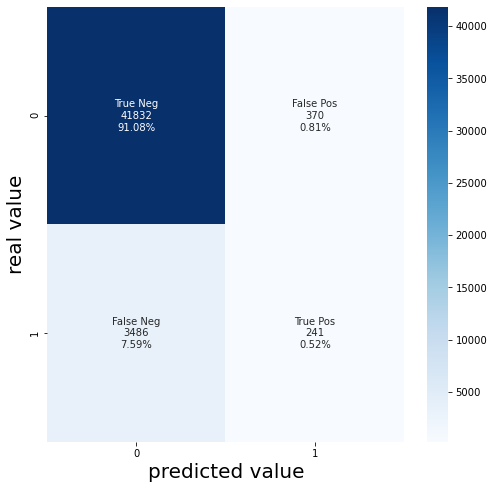

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42202
           1       0.39      0.06      0.11      3727

    accuracy                           0.92     45929
   macro avg       0.66      0.53      0.53     45929
weighted avg       0.88      0.92      0.89     45929


Les 20 features les plus importantes du modèle sont :
     Value                                         Feature
159     75              APP_DAYS_EMPLOYED+APP_EXT_SOURCE_2
160     75    BUR_DAYS_CREDIT_ENDDATE_max-APP_EXT_SOURCE_2
161     77                                 APP_CODE_GENDER
162     83                POS_CASH_CNT_INSTALMENT_mean_max
163     87                APP_AMT_ANNUITY-APP_EXT_SOURCE_2
164     87  INST_PAY_AMT_PAYMENT_min_mean+APP_EXT_SOURCE_2
165     95                    PREVIOUS_APPL_AMT_CREDIT_min
166    103                             APP_AMT_GOODS_PRICE
167    103                   POS_CASH_SK_DPD_DEF_mean_mean
168    108            BUR_DA

In [103]:
preds3 = sigmoid(model_final.predict(X_val)).round(0)
viz_performance_model(y_val, preds3)

# Mieux comprendre les prédictions globales

In [104]:
print(X_train.shape)
print(y_train.shape)

(183714, 179)
(183714, 1)


In [105]:
print(test_X.shape)

(76576, 179)


In [106]:
# On va encoder les variables catégorielles
encoded_train_X=pd.DataFrame({col: X_train[col].astype('category').cat.codes for col in X_train}, index=X_train.index)

In [107]:
encoded_train_X.shape

(183714, 179)

In [108]:
encoded_val_X=pd.DataFrame({col: X_val[col].astype('category').cat.codes for col in X_val}, index=X_val.index)

In [109]:
encoded_test_X=pd.DataFrame({col: test_X[col].astype('category').cat.codes for col in test_X}, index=test_X.index)

In [110]:
encoded_test_X.shape

(76576, 179)

In [111]:
#Création du modèle final
a, g =0.7,20
focal_loss2 = lambda x,y: focal_loss_lgb_correct(x, y, alpha=a, gamma=g)
focal_loss_eval2 = lambda x,y: focal_loss_lgb_eval_correct(x, y, alpha=a, gamma=g)

In [112]:
model_final =LGBMClassifier(objective=focal_loss2 ,
                       metric="",
                       learning_rate=0.1,
                       n_estimators=200,
                       n_jobs=-1
                       
                      )

In [113]:
#On modifie les dimensions du vecteur y
y_train = y_train.squeeze()

In [114]:
model_final.fit( encoded_train_X,y_train, 
           eval_metric=focal_loss_eval2,
          eval_set =(encoded_val_X,y_val),
          early_stopping_rounds=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	valid_0's focal_loss: 2.09379e-07
Training until validation scores don't improve for 10 rounds
[2]	valid_0's focal_loss: 2.01377e-07
[3]	valid_0's focal_loss: 1.94911e-07
[4]	valid_0's focal_loss: 1.88974e-07
[5]	valid_0's focal_loss: 1.83543e-07
[6]	valid_0's focal_loss: 1.79074e-07
[7]	valid_0's focal_loss: 1.75457e-07
[8]	valid_0's focal_loss: 1.72335e-07
[9]	valid_0's focal_loss: 1.69829e-07
[10]	valid_0's focal_loss: 1.67609e-07
[11]	valid_0's focal_loss: 1.65797e-07
[12]	valid_0's focal_loss: 1.64172e-07
[13]	valid_0's focal_loss: 1.62645e-07
[14]	valid_0's focal_loss: 1.61455e-07
[15]	valid_0's focal_loss: 1.60439e-07
[16]	valid_0's focal_loss: 1.59732e-07
[17]	valid_0's focal_loss: 1.59063e-07
[18]	valid_0's focal_loss: 1.58234e-07
[19]	valid_0's focal_loss: 1.57722e-07
[20]	valid_0's focal_loss: 1.5732e-07
[21]	valid_0's focal_loss: 1.56944e-07
[22]	valid_0's focal_loss: 1.56475e-07
[23]	valid_0's focal_loss: 1.56118e-07
[24]	valid_0's focal_loss: 1.55844e-07
[25]	valid_0'

LGBMClassifier(metric='', n_estimators=200,
               objective=<function <lambda> at 0x00000208291B5D30>)

On obtient un graphique d'importance des variables, classées par ordre décroissant. Les top variables contribuent plus au modèle et ont un plus grand pouvoir prédictif. 

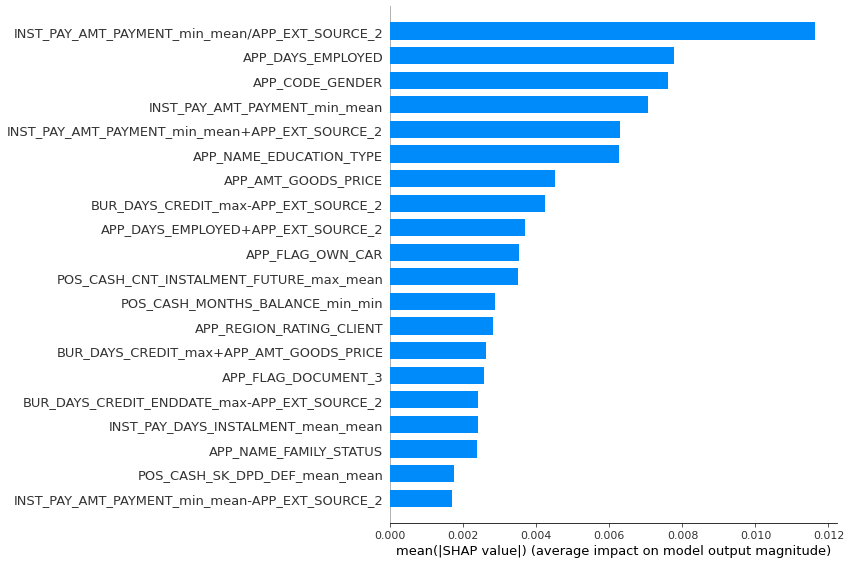

In [115]:
import shap
shap_values = shap.TreeExplainer(model_final).shap_values(encoded_train_X)
shap.summary_plot(shap_values, encoded_train_X, plot_type="bar")

On peut également visualiser l'impact positif et négatif des prédicteurs sur la target

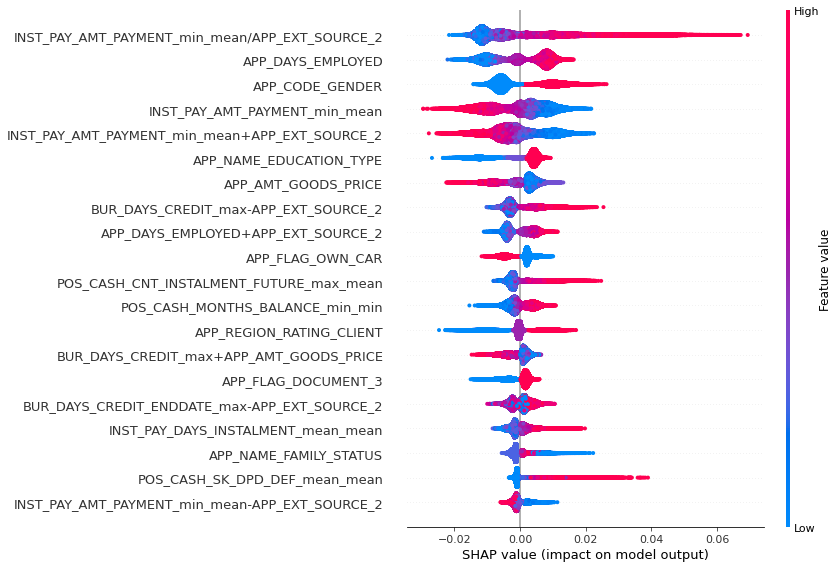

In [116]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, encoded_train_X)

Ce plot comporte tous les points du train set. Il montre les informations suivantes :
- Feature importance: Les variables sont classées par ordre décroissant
- Leur impact: Leur positionement horizontal monthre si leur effet est associé à un prédiction tirant plutôt vers 0 ou 1 
- La tendance : La couleur montre si cette variable va tirer le modèle plutôt à la hausse ou la la baisse suivant le sens dans lequel elle varie.

# Mieux comprendre les résultats individuels

In [117]:
# On va désormais faire l'étude au niveau d'un seul enregistrement

line_A = 27
data_for_prediction_A = encoded_train_X.iloc[line_A]
data_for_prediction_array_A = data_for_prediction_A.values.reshape(1, -1).astype('float')

In [118]:
col_name = list(data_for_prediction_A.index)

In [119]:
# On calcule la shap value pour cet enregistrement
explainer = shap.TreeExplainer(model_final)

In [120]:
data_for_prediction_A = pd.to_numeric(data_for_prediction_A, downcast='float')

In [166]:
list(data_for_prediction_A.index)

['APP_AMT_CREDIT-APP_EXT_SOURCE_2',
 'APP_AMT_REQ_CREDIT_BUREAU_HOUR',
 'APP_CNT_CHILDREN',
 'APP_FLAG_CONT_MOBILE',
 'APP_FLAG_DOCUMENT_10',
 'APP_FLAG_DOCUMENT_11',
 'APP_FLAG_DOCUMENT_12',
 'APP_FLAG_DOCUMENT_15',
 'APP_FLAG_DOCUMENT_17',
 'APP_FLAG_DOCUMENT_19',
 'APP_FLAG_DOCUMENT_2',
 'APP_FLAG_DOCUMENT_20',
 'APP_FLAG_DOCUMENT_21',
 'APP_FLAG_DOCUMENT_4',
 'APP_FLAG_DOCUMENT_5',
 'APP_FLAG_DOCUMENT_6',
 'APP_FLAG_DOCUMENT_7',
 'APP_FLAG_DOCUMENT_9',
 'APP_FLAG_EMP_PHONE',
 'APP_FLAG_MOBIL',
 'APP_LIVE_CITY_NOT_WORK_CITY',
 'APP_REG_REGION_NOT_LIVE_REGION',
 'APP_REG_REGION_NOT_WORK_REGION',
 'BUR_AMT_CREDIT_SUM_OVERDUE_min',
 'BUR_CNT_CREDIT_PROLONG_max',
 'BUR_CNT_CREDIT_PROLONG_mean',
 'BUR_CNT_CREDIT_PROLONG_min',
 'BUR_CREDIT_DAY_OVERDUE_max',
 'BUR_CREDIT_DAY_OVERDUE_min',
 'INST_PAY_AMT_PAYMENT_min_mean-APP_EXT_SOURCE_3',
 'INST_PAY_NUM_INSTALMENT_NUMBER_min_max',
 'INST_PAY_NUM_INSTALMENT_NUMBER_min_mean',
 'INST_PAY_NUM_INSTALMENT_NUMBER_min_min',
 'INST_PAY_NUM_INSTALME

In [121]:
data_for_prediction_array_A

array([[ 3.11150e+04,  0.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  9.00000e+02,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  1.00000e+00,  1.00000e+00,  2.30000e+01,
         4.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         4.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         1.00000e+00,  1.00000e+00,  3.07470e+04,  3.07470e+04,
         3.07470e+04,  3.04990e+04,  3.04990e+04,  3.04990e+04,
         3.07470e+04,  3.07470e+04,  3.04990e+04,  3.04990e+04,
         3.07470e+04,  3.07470e+04,  3.07470e+04,  3.04990e+04,
         3.04990e+04,  3.04990e+04,  3.8

In [122]:
shap_values_A = explainer.shap_values(data_for_prediction_array_A)

In [123]:
# Prédire la proba en sortie
prob_A = sigmoid(model_final.predict_proba(data_for_prediction_array_A))

Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.


In [124]:
print('probabilité de défaut de crédit pour cet utilisateur: ',prob_A)

probabilité de défaut de crédit pour cet utilisateur:  [0.47437195]


In [125]:
# SHAP Value visualization for team A
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_A, data_for_prediction_array_A,feature_names=col_name)

In [126]:
explainer.expected_value

-0.09541066378079317

In [127]:
shap_values_A.shape

(1, 179)

In [ ]:
https://scikit-learn.org/stable/modules/model_persistence.html

In [132]:
# Model persistence pour l'exporter vers d'autres applications
# Version 1
from joblib import dump, load

In [144]:
dump(model_final, 'model.joblib') 

PicklingError: Can't pickle <function <lambda> at 0x00000208291B5D30>: it's not found as __main__.<lambda>

In [143]:
# Version 2
import pickle
s = pickle.dumps(model_final)

PicklingError: Can't pickle <function <lambda> at 0x00000208291B5D30>: attribute lookup <lambda> on __main__ failed

In [161]:
# L'erreur provient des fonctions lambdas utilisées dans la défintion de la focale loss. Il faut les utiliser en redéfinissant complètement la fonction avec un def

In [140]:
import lightgbm as lgb

In [142]:
# Version 3
model_final.booster_.save_model('mode.txt')

In [141]:
#Test : charger depuis un modèle:
bst = lgb.Booster(model_file='mode.txt')

In [146]:
pred_test = bst.predict(data_for_prediction_array_A)

In [160]:
sigmoid(pred_test)

array([0.47437195])

Le résultat est similaire au modèle non sauvegardé. C'est donc concluant

In [155]:
#On va exporter les données pour pouvoir les utiliser dans notre tableau de bord
encoded_train_X.to_csv("encoded_train_X.csv", index=False)

In [163]:
model_string = model_final.booster_.model_to_string()